# Worksheet: Classification II: evaluation & tuning

This worksheet covers the [Classification II: evaluation & tuning](https://datasciencebook.ca/classification2.html) chapter of the online textbook, which also lists the learning objectives for this worksheet. You should read the textbook chapter before attempting this worksheet. 

In [19]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Question 0.1** Multiple Choice:
<br>{points: 1}

Before applying k-nearest neighbour to a classification task, we need to scale the data. What is the purpose of this step?

A. To help speed up the knn algorithm.

B. To convert all data observations to numeric values.

C. To ensure all data observations will be on a comparable scale and contribute equal shares to the calculation of the distance between points.

D. None of the above.

*Assign your answer to an object called `answer0.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`)*.

In [20]:
# your code here
answer0.1<-"C"# No Answer - remove if you provide an answer

In [21]:
library(digest)
stopifnot("type of answer0.1 is not character"= setequal(digest(paste(toString(class(answer0.1)), "d61f1")), "f94d540efe5be545d1314ed7fc4cef50"))
stopifnot("length of answer0.1 is not correct"= setequal(digest(paste(toString(length(answer0.1)), "d61f1")), "ae230260b0d96065a2fa62385253b54f"))
stopifnot("value of answer0.1 is not correct"= setequal(digest(paste(toString(tolower(answer0.1)), "d61f1")), "6c38fdd008504ba826aad69718a6df26"))
stopifnot("letters in string value of answer0.1 are correct but case is not correct"= setequal(digest(paste(toString(answer0.1), "d61f1")), "b7d893c6d594e358e4eb8b1d6dcb0a91"))

print('Success!')

[1] "Success!"


**Question 0.2** Multiple Choice:
<br>{points: 1}

The confusion matrix is:

A. A way to confuse you.

B. A table where rows correspond to predicted class and columns correspond to true class.

C. Each cell in the confusion matrix displays the number of observations with a particular predicted/true class as given by the row and column labels.

D. Is an important tool for understanding what type of mistakes a classifier makes and how often these mistakes happen.

E. All of the above except A.

*Assign your answer to an object called `answer0.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`)*.

In [22]:
# your code here
answer0.2<-"E"# No Answer - remove if you provide an answer

In [23]:
library(digest)
stopifnot("type of answer0.2 is not character"= setequal(digest(paste(toString(class(answer0.2)), "1f34d")), "638069ba8e223b370e5b7ffbc657e4df"))
stopifnot("length of answer0.2 is not correct"= setequal(digest(paste(toString(length(answer0.2)), "1f34d")), "ef68b1075103f89ad725c62972606ae8"))
stopifnot("value of answer0.2 is not correct"= setequal(digest(paste(toString(tolower(answer0.2)), "1f34d")), "9fb58f7e446dbffc67dbb797f1c8f6d0"))
stopifnot("letters in string value of answer0.2 are correct but case is not correct"= setequal(digest(paste(toString(answer0.2), "1f34d")), "76cd8e94fc72c79f339e2c39dfb0987c"))

print('Success!')

[1] "Success!"


**Question 0.3** Multiple Choice:
<br>{points: 1}

Precision and recall are ways to summarize the confusion matrix. What is something we must do before calculating precision and recall?

A. Turn the values (counts of observations) appearing in each cell of the table into a proportion. 

B. Choose one of the class label as being more interesting and equate that with the "positive" label.

C. Flip the column and rows of the matrix.

D. None of the above.

*Assign your answer to an object called `answer0.3`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`)*.

In [24]:
# your code here
answer0.3<-"B"# No Answer - remove if you provide an answer

In [25]:
library(digest)
stopifnot("type of answer0.3 is not character"= setequal(digest(paste(toString(class(answer0.3)), "41946")), "c8b24a798cc1a59611837ee1c555ebb9"))
stopifnot("length of answer0.3 is not correct"= setequal(digest(paste(toString(length(answer0.3)), "41946")), "63374a30ca7f20b8f777e0337f2ee14d"))
stopifnot("value of answer0.3 is not correct"= setequal(digest(paste(toString(tolower(answer0.3)), "41946")), "1f7f0e091fe8d141b0c3dcfceb3edf72"))
stopifnot("letters in string value of answer0.3 are correct but case is not correct"= setequal(digest(paste(toString(answer0.3), "41946")), "4854984eec9ba33a9c1318561a87ae78"))

print('Success!')

[1] "Success!"


## 1. Fruit Data Example - (Part II)
**Question 1.0** 
<br>{points: 1}

You will recognize a few of the first questions in this worksheet from last week's tutorial. This will help you repeat some of the fundamentals of classification before tackling the later questions in this worksheet, which integrate concepts you learned from this week's material. First, load the file `fruit_data.csv` (found in the data folder) from the previous tutorial into your notebook.

`mutate()` the `fruit_name` column such that it is a factor using `as_factor()`.

*Assign your data to an object called `fruit_data`.*

In [26]:
# your code here
fruit_data<-read_csv("data/fruit_data.csv")|>
    mutate(fruit_name = as_factor(fruit_name))# No Answer - remove if you provide an answer

Rows: 59 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): fruit_name, fruit_subtype
dbl (5): fruit_label, mass, width, height, color_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [27]:
library(digest)
stopifnot("fruit_data should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(fruit_data)), "29200")), "c249325125328e94ba87b9a5ae1ebf01"))
stopifnot("dimensions of fruit_data are not correct"= setequal(digest(paste(toString(dim(fruit_data)), "29200")), "e2a58c3c53217ed41a9a0b155439e057"))
stopifnot("column names of fruit_data are not correct"= setequal(digest(paste(toString(sort(colnames(fruit_data))), "29200")), "5a69ac127109ff06412627c48ee1a81a"))
stopifnot("types of columns in fruit_data are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(fruit_data, class)))), "29200")), "535245b3684c2c9b56dd3fb194ab4e1d"))
stopifnot("values in one or more numerical columns in fruit_data are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_data, is.numeric))) sort(round(sapply(fruit_data[, sapply(fruit_data, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "29200")), "3d9aa00970f2bcaf0f8129f5f61e67e8"))
stopifnot("values in one or more character columns in fruit_data are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_data, is.character))) sum(sapply(fruit_data[sapply(fruit_data, is.character)], function(x) length(unique(x)))) else 0), "29200")), "ba0b354e5d3a00f41162523f56c174f3"))
stopifnot("values in one or more factor columns in fruit_data are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_data, is.factor))) sum(sapply(fruit_data[, sapply(fruit_data, is.factor)], function(col) length(unique(col)))) else 0), "29200")), "b3b0353d44dbea0fd1160775cb1cdb23"))

print('Success!')

[1] "Success!"


Let's take a look at the first six observations in the fruit dataset. Run the cell below.

In [28]:
# Run this cell. 
slice(fruit_data, 1:6)

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59
1,apple,granny_smith,176,7.4,7.2,0.60
2,mandarin,mandarin,86,6.2,4.7,0.80
2,mandarin,mandarin,84,6.0,4.6,0.79
2,mandarin,mandarin,80,5.8,4.3,0.77


Run the cell below, and find the nearest neighbour based on mass and width to the first observation just by looking at the scatterplot (the first observation has been circled for you).

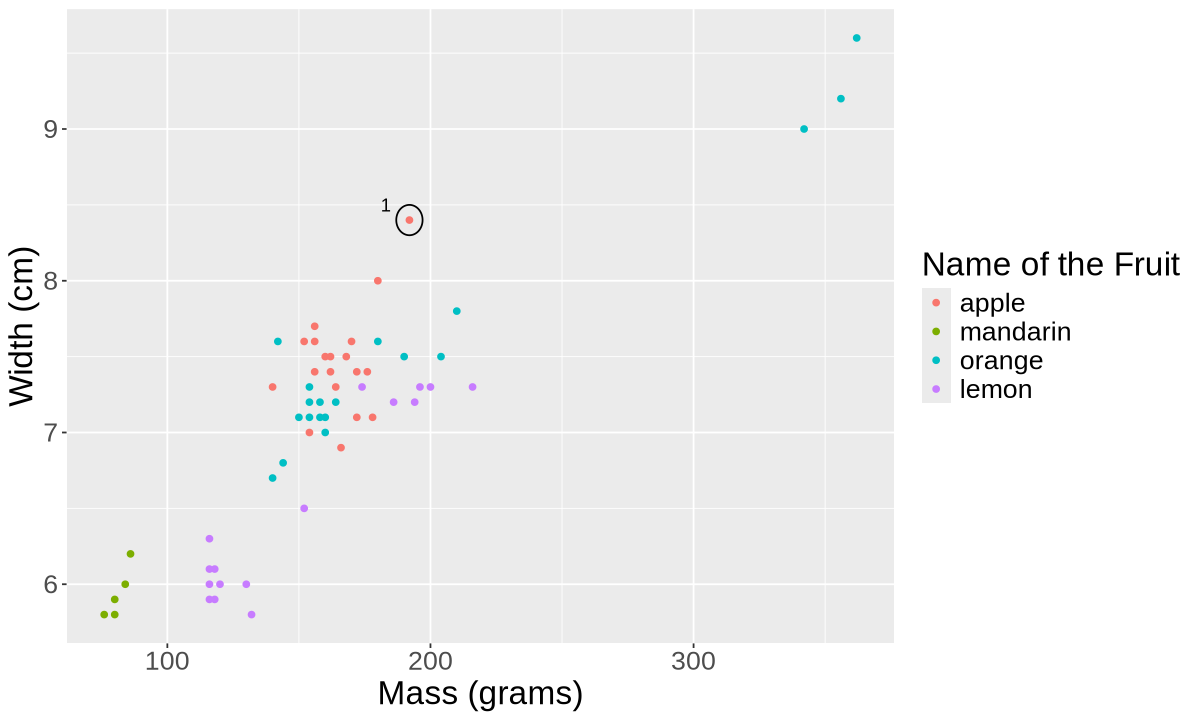

In [29]:
# Run this cell. 
options(repr.plot.width=10, repr.plot.height=6)
point1 <- c(192, 8.4)
point2 <- c(180, 8)
point44 <- c(194, 7.2)

fruit_data |>  
    ggplot(aes(x=mass, 
               y= width, 
               colour = fruit_name)) +
        labs(x = "Mass (grams)",
             y = "Width (cm)",
            colour = 'Name of the Fruit') +
        geom_point() +
        annotate("path", 
                 x=point1[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point1[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 183, y =  8.5, label = "1") +
        theme(text = element_text(size = 20))

**Question 1.1** Multiple Choice:
<br>{points: 1}

Based on the graph generated, what is the `fruit_name` of the closest data point to the one circled?

A. apple

B. lemon

C. mandarin

D. orange

*Assign your answer to an object called `answer1.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [30]:
# your code here
answer1.1<-"A" # No Answer - remove if you provide an answer

In [31]:
library(digest)
stopifnot("type of answer1.1 is not character"= setequal(digest(paste(toString(class(answer1.1)), "44bf7")), "d3d5f726ac1bc5dab8facb6f10c460d3"))
stopifnot("length of answer1.1 is not correct"= setequal(digest(paste(toString(length(answer1.1)), "44bf7")), "a1ed3053755affd6038f04c20c6d237f"))
stopifnot("value of answer1.1 is not correct"= setequal(digest(paste(toString(tolower(answer1.1)), "44bf7")), "61b8189fe3d242091af9c59b605abf69"))
stopifnot("letters in string value of answer1.1 are correct but case is not correct"= setequal(digest(paste(toString(answer1.1), "44bf7")), "5ae0897a033f3e10d8991d25beb06c17"))

print('Success!')

[1] "Success!"


**Question 1.2**
<br>{points: 1}

Using `mass` and `width`, calculate the distance between the first observation and the second observation.

We provide a scaffolding to get you started.

*Assign your answer to an object called `fruit_dist_2`.*

In [32]:
fruit_dist_2 <- fruit_data |>
    slice(1, 2) |> # We use slice to get the first two rows of the fruit dataset
   select(mass, width) |>
dist()

# your code here
# No Answer - remove if you provide an answer
fruit_dist_2


         1
2 12.00666

In [33]:
library(digest)
stopifnot("type of fruit_dist_2[1] is not numeric"= setequal(digest(paste(toString(class(fruit_dist_2[1])), "d9302")), "65c0a0808fecf2319a4892a69be584bb"))
stopifnot("value of fruit_dist_2[1] is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(fruit_dist_2[1], 2)), "d9302")), "83a1f8cd6e6251e9659b0bd64dad1a85"))
stopifnot("length of fruit_dist_2[1] is not correct"= setequal(digest(paste(toString(length(fruit_dist_2[1])), "d9302")), "cb59c3597d965ca14671650f79521113"))
stopifnot("values of fruit_dist_2[1] are not correct"= setequal(digest(paste(toString(sort(round(fruit_dist_2[1], 2))), "d9302")), "83a1f8cd6e6251e9659b0bd64dad1a85"))

print('Success!')

[1] "Success!"


**Question 1.3**
<br>{points: 1}

Calculate the distance between the first and the **44th observation** in the `fruit` dataset using the `mass` and `width` variables.

You can see from the data frame output from the cell below that **observation 44** has `mass` = 194 g and `width` = 7.2 cm.

*Assign your answer to an object called `fruit_dist_44`.*

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
4,lemon,spanish_belsan,194,7.2,10.3,0.7


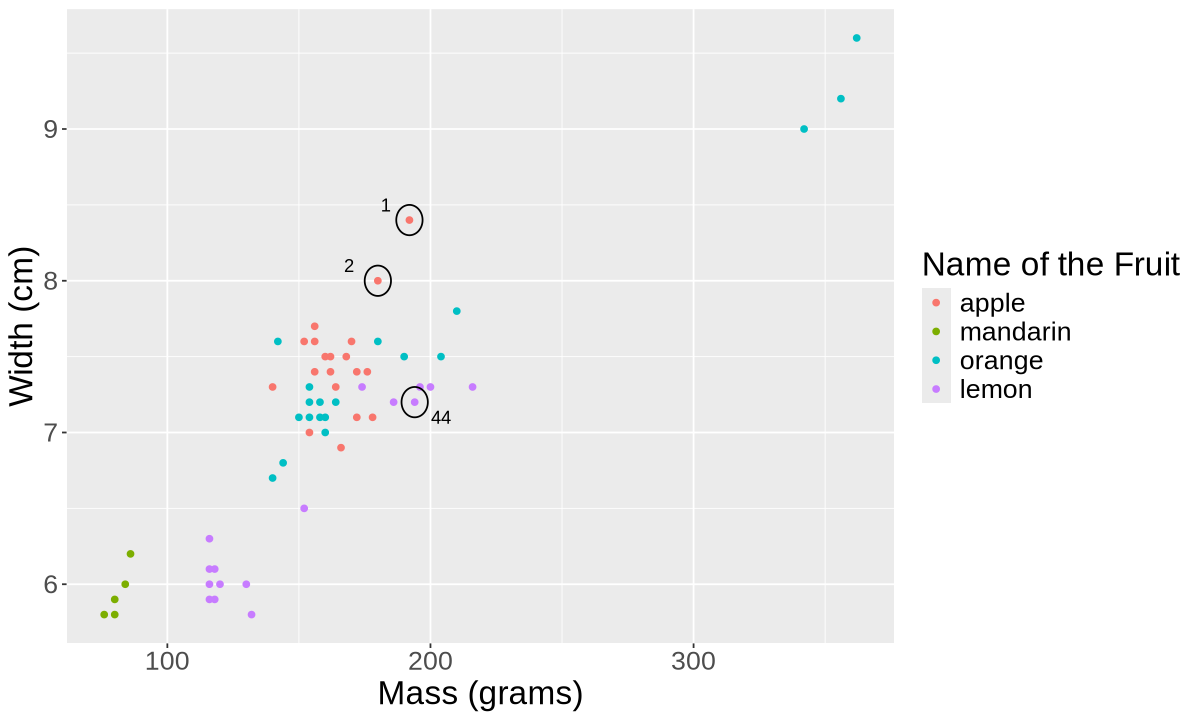

In [34]:
# Run this cell. 

filter(fruit_data, row_number() == 44)

point1 <- c(192, 8.4)
point2 <- c(180, 8)
point44 <- c(194, 7.2)

fruit_data |>
    ggplot(aes(x = mass, 
               y = width, 
               colour = fruit_name)) +
        labs(x = "Mass (grams)",
             y = "Width (cm)",
            colour = 'Name of the Fruit') +
        geom_point() +
        annotate("path", 
                 x=point1[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point1[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 183, y =  8.5, label = "1") +
        annotate("path",
                 x=point2[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point2[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 169, y =  8.1, label = "2") +
        annotate("path",
                 x=point44[1] + 5*cos(seq(0,2*pi,length.out=100)),
                 y=point44[2]+0.1*sin(seq(0,2*pi,length.out=100))) +
        annotate("text", x = 204, y =  7.1, label = "44") +
        theme(text = element_text(size = 20))

In [35]:
# your code here
fruit_dist_44<-sqrt((194-192)^2+(7.2-8.4)^2) # No Answer - remove if you provide an answer

In [36]:
library(digest)
stopifnot("type of fruit_dist_44[1] is not numeric"= setequal(digest(paste(toString(class(fruit_dist_44[1])), "a5551")), "2cf1678010dbd300bf2a85836279249a"))
stopifnot("value of fruit_dist_44[1] is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(fruit_dist_44[1], 2)), "a5551")), "4aa3604da406839833af0fa9cce81cce"))
stopifnot("length of fruit_dist_44[1] is not correct"= setequal(digest(paste(toString(length(fruit_dist_44[1])), "a5551")), "5dfd8a1b91af7f0ecc1be97128ab9edb"))
stopifnot("values of fruit_dist_44[1] are not correct"= setequal(digest(paste(toString(sort(round(fruit_dist_44[1], 2))), "a5551")), "4aa3604da406839833af0fa9cce81cce"))

print('Success!')

[1] "Success!"


What do you notice about your answers from **Question 1.2** & **1.3** that you just calculated? Is it what you would expect given the scatter plot above? Why or why not? Discuss this.

*Hint: Look at where the observations are on the scatterplot in the cell above this question. What might happen if we changed grams into kilograms to measure the mass?*

**Question 1.4**
<br>{points: 1}

From the distance calculation, we see that observation 1 and 44 have a smaller distance than observation 1 and 2. However, if we look at the scatterplot the distance of the first observation to the second observation appears closer than to the 44th observation.

Which of the following statements is correct?

A. A difference of 12 g in mass between observation 1 and 2 is large compared to a difference of 1.2 cm in width between observation 1 and 44. Consequently, mass will drive the classification results, and width will have less of an effect. Hence, our distance calculation reflects that.

B. If we measured mass in kilograms, then we’d get different classification results.

C. We should standardize the data so that all variables will be on a comparable scale.

D. All of the above.

*Assign your answer to an object called `answer1.4`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [37]:
# your code here
# No Answer - remove if you provide an answer
answer1.4<-"D"

In [38]:
library(digest)
stopifnot("type of answer1.4 is not character"= setequal(digest(paste(toString(class(answer1.4)), "42813")), "e325fb392e4ebf6f6c3baa725590daac"))
stopifnot("length of answer1.4 is not correct"= setequal(digest(paste(toString(length(answer1.4)), "42813")), "321f16a57dbd8151ee0164b5ff2cfccb"))
stopifnot("value of answer1.4 is not correct"= setequal(digest(paste(toString(tolower(answer1.4)), "42813")), "1d5a63b0fe16c743d79f52a40396a150"))
stopifnot("letters in string value of answer1.4 are correct but case is not correct"= setequal(digest(paste(toString(answer1.4), "42813")), "40665438bd5332979a4f9a87d16e7f58"))

print('Success!')

[1] "Success!"


**Question 1.5**
<br>{points: 1}

Scale and center all the variables of the `fruit` dataset and save them as columns in your data table.

Save the dataset object and call it `fruit_data_scaled`. Make sure to name the new columns `scaled_*` where * is the old column name (e.g. `scaled_mass`). Do not drop the unscaled columns (`mass`, `width`, `height`, `color_score`).

In [39]:
fruit_data_scaled <- fruit_data |> 
mutate(scaled_mass = scale(mass, center = TRUE), 
       scaled_width = scale(width, center = TRUE),
     scaled_height = scale(height, center = TRUE),
       scaled_color_score = scale(color_score, center = TRUE))

# your code here
# No Answer - remove if you provide an answer
fruit_data_scaled

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,scaled_mass,scaled_width,scaled_height,scaled_color_score
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,apple,granny_smith,192,8.4,7.3,0.55,0.5249358,1.5850841,-0.2889166,-2.769820
1,apple,granny_smith,180,8.0,6.8,0.59,0.3068287,1.0954508,-0.6562889,-2.249376
1,apple,granny_smith,176,7.4,7.2,0.60,0.2341263,0.3610008,-0.3623910,-2.119265
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,lemon,unknown,116,5.9,8.1,0.73,-0.8564094,-1.4751241,0.2988792,-0.4278225
4,lemon,unknown,152,6.5,8.5,0.72,-0.2020880,-0.7406741,0.5927771,-0.5579334
4,lemon,unknown,118,6.1,8.1,0.70,-0.8200582,-1.2303074,0.2988792,-0.8181553


In [40]:
library(digest)
stopifnot("fruit_data_scaled should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(fruit_data_scaled)), "b8e60")), "84b978795eaaf3c4b8fa6efe160781c1"))
stopifnot("dimensions of fruit_data_scaled are not correct"= setequal(digest(paste(toString(dim(fruit_data_scaled)), "b8e60")), "023264909d9ef1ac5f5984391a0cb3ff"))
stopifnot("column names of fruit_data_scaled are not correct"= setequal(digest(paste(toString(sort(colnames(fruit_data_scaled))), "b8e60")), "2199f7beff77c257cbbd65cb229b848b"))
stopifnot("types of columns in fruit_data_scaled are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(fruit_data_scaled, class)))), "b8e60")), "0cf4c9b91dd9498b9b416fbedc2d3d1a"))
stopifnot("values in one or more numerical columns in fruit_data_scaled are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_data_scaled, is.numeric))) sort(round(sapply(fruit_data_scaled[, sapply(fruit_data_scaled, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "b8e60")), "ac6a3e70cef6a488a8b353a253b63d80"))
stopifnot("values in one or more character columns in fruit_data_scaled are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_data_scaled, is.character))) sum(sapply(fruit_data_scaled[sapply(fruit_data_scaled, is.character)], function(x) length(unique(x)))) else 0), "b8e60")), "a27082f60209194d8e8d5830fa6a2e04"))
stopifnot("values in one or more factor columns in fruit_data_scaled are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_data_scaled, is.factor))) sum(sapply(fruit_data_scaled[, sapply(fruit_data_scaled, is.factor)], function(col) length(unique(col)))) else 0), "b8e60")), "98874f8ae5103a02282d7d170322fc4e"))

stopifnot("type of round(sum(fruit_data_scaled$scaled_mass), 2) is not numeric"= setequal(digest(paste(toString(class(round(sum(fruit_data_scaled$scaled_mass), 2))), "b8e61")), "30a2aed2af3c05cb961d8f7fbda4505a"))
stopifnot("value of round(sum(fruit_data_scaled$scaled_mass), 2) is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(round(sum(fruit_data_scaled$scaled_mass), 2), 2)), "b8e61")), "02652591c9d5463729147f4aa6955da9"))
stopifnot("length of round(sum(fruit_data_scaled$scaled_mass), 2) is not correct"= setequal(digest(paste(toString(length(round(sum(fruit_data_scaled$scaled_mass), 2))), "b8e61")), "a477ef3d2632c0ea963bd6b1563b1787"))
stopifnot("values of round(sum(fruit_data_scaled$scaled_mass), 2) are not correct"= setequal(digest(paste(toString(sort(round(round(sum(fruit_data_scaled$scaled_mass), 2), 2))), "b8e61")), "02652591c9d5463729147f4aa6955da9"))

stopifnot("type of round(sum(fruit_data_scaled$scaled_width), 2) is not numeric"= setequal(digest(paste(toString(class(round(sum(fruit_data_scaled$scaled_width), 2))), "b8e62")), "b21bf119545b72fb46c97a5bf2745615"))
stopifnot("value of round(sum(fruit_data_scaled$scaled_width), 2) is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(round(sum(fruit_data_scaled$scaled_width), 2), 2)), "b8e62")), "a7de2ad81e358d706ca8a1b66fbe7d91"))
stopifnot("length of round(sum(fruit_data_scaled$scaled_width), 2) is not correct"= setequal(digest(paste(toString(length(round(sum(fruit_data_scaled$scaled_width), 2))), "b8e62")), "dd5fb4ecefdd85025727009657090d10"))
stopifnot("values of round(sum(fruit_data_scaled$scaled_width), 2) are not correct"= setequal(digest(paste(toString(sort(round(round(sum(fruit_data_scaled$scaled_width), 2), 2))), "b8e62")), "a7de2ad81e358d706ca8a1b66fbe7d91"))

stopifnot("type of round(sum(fruit_data_scaled$scaled_height), 2) is not numeric"= setequal(digest(paste(toString(class(round(sum(fruit_data_scaled$scaled_height), 2))), "b8e63")), "dc749e70e6671755f1120b3bd213e3f4"))
stopifnot("value of round(sum(fruit_data_scaled$scaled_height), 2) is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(round(sum(fruit_data_scaled$scaled_height), 2), 2)), "b8e63")), "3b1466b148aba47066937d7f94e6ae1c"))
stopifnot("length of round(sum(fruit_data_scaled$scaled_height), 2) is not correct"= setequal(digest(paste(toString(length(round(sum(fruit_data_scaled$scaled_height), 2))), "b8e63")), "d9974049ccebedc3a9f7265b4cdd38b0"))
stopifnot("values of round(sum(fruit_data_scaled$scaled_height), 2) are not correct"= setequal(digest(paste(toString(sort(round(round(sum(fruit_data_scaled$scaled_height), 2), 2))), "b8e63")), "3b1466b148aba47066937d7f94e6ae1c"))

stopifnot("type of round(sum(fruit_data_scaled$scaled_color_score), 2) is not numeric"= setequal(digest(paste(toString(class(round(sum(fruit_data_scaled$scaled_color_score), 2))), "b8e64")), "e610de47516187394c651c8f02b444a6"))
stopifnot("value of round(sum(fruit_data_scaled$scaled_color_score), 2) is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(round(sum(fruit_data_scaled$scaled_color_score), 2), 2)), "b8e64")), "f39509a06b202edb9f86b7a4a09c2293"))
stopifnot("length of round(sum(fruit_data_scaled$scaled_color_score), 2) is not correct"= setequal(digest(paste(toString(length(round(sum(fruit_data_scaled$scaled_color_score), 2))), "b8e64")), "dc3f4ac0c6d40877ab4ed8bb11569eff"))
stopifnot("values of round(sum(fruit_data_scaled$scaled_color_score), 2) are not correct"= setequal(digest(paste(toString(sort(round(round(sum(fruit_data_scaled$scaled_color_score), 2), 2))), "b8e64")), "f39509a06b202edb9f86b7a4a09c2293"))

print('Success!')

[1] "Success!"



**Question 1.6**
<br>{points: 1}

Let's repeat **Question 1.2** and **1.3** with the scaled variables:

- calculate the distance with the scaled mass and width variables between observations 1 and 2
- calculate the distances with the scaled mass and width variables between observations 1 and 44

After you do this, think about how these distances compared to the distances you computed in **Question 1.2** and **1.3** for the same points.

*Assign your answers to objects called `distance_2` and `distance_44` respectively.*

In [41]:
distance_2<- fruit_data_scaled |>
    slice(1, 2) |> # We use slice to get the first two rows of the fruit dataset
   select(scaled_mass, scaled_width) |>
dist()

distance_44<- fruit_data_scaled |>
    slice(1, 44) |> # We use slice to get the first two rows of the fruit dataset
   select(scaled_mass, scaled_width) |>
dist()

# your code here
# No Answer - remove if you provide an answer

distance_2
distance_44

          1
2 0.5360145

        1
2 1.46935

In [42]:
library(digest)
stopifnot("type of distance_2[1] is not numeric"= setequal(digest(paste(toString(class(distance_2[1])), "1b6fb")), "35f582c5f6cb02b7330a80c2205b9e62"))
stopifnot("value of distance_2[1] is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(distance_2[1], 2)), "1b6fb")), "d50cfb0d9ca407da29ab89ab8b9d2d64"))
stopifnot("length of distance_2[1] is not correct"= setequal(digest(paste(toString(length(distance_2[1])), "1b6fb")), "b1b6ac32c1555e6d1f69e4e7153dc40a"))
stopifnot("values of distance_2[1] are not correct"= setequal(digest(paste(toString(sort(round(distance_2[1], 2))), "1b6fb")), "d50cfb0d9ca407da29ab89ab8b9d2d64"))

stopifnot("type of distance_44[1] is not numeric"= setequal(digest(paste(toString(class(distance_44[1])), "1b6fc")), "785f66be2721f98f29cc7f2455f0d927"))
stopifnot("value of distance_44[1] is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(distance_44[1], 2)), "1b6fc")), "7d52b9f832ec22b1b8c15bf790d3cdbf"))
stopifnot("length of distance_44[1] is not correct"= setequal(digest(paste(toString(length(distance_44[1])), "1b6fc")), "9158350991020d41872230f41c16365f"))
stopifnot("values of distance_44[1] are not correct"= setequal(digest(paste(toString(sort(round(distance_44[1], 2))), "1b6fc")), "7d52b9f832ec22b1b8c15bf790d3cdbf"))

print('Success!')

[1] "Success!"


## Randomness and Setting Seeds

This worksheet uses functions from the `tidymodels` library, which not only allows us to perform K-nearest neighbour classification, but also allows us to evaluate how well our classification worked. In order to ensure that the steps in the worksheet are reproducible, we need to set a *seed*, i.e., a numerical "starting value," which determines the sequence of random numbers R will generate.

Below in many cells we have included a call to `set.seed`. **Do not remove these lines of code**; they are necessary to make sure the autotesting code functions properly.

> *The reason we have `set.seed` in so many places is that Jupyter notebooks are organized into cells that can be run out of order. Since things can be run out of order, the exact sequence of random values that is used in each cell is hard to determine, which makes autotesting really difficult.  We had two options: either enforce that you only ever run the code by hitting "Restart & Run All" to ensure that we get the same values of randomness each time, or put `set.seed` in a lot of places (we chose the latter). One drawback of calling `set.seed` everywhere is that the numbers that will be generated won't really be random. For the purposes of teaching and learning, that is fine here. But __in your course project and other data analyses outside of this course, you must call `set.seed` only once at the beginning of the analysis, so that your random numbers are actually reasonably random.__*

## 2. Splitting the data into a training and test set

In this exercise, we will be partitioning `fruit_data` into a training (75%) and testing (25%) set using the `tidymodels` package. After creating the test set, we will put the test set away in a lock box and not touch it again until we have found the best k-nn classifier we can make using the training set. We will use the variable `fruit_name` as our class label. 


**Question 2.0**
<br> {points: 1}

To create the training and test set, first use the `initial_split` function to split `fruit_data`. Specify you want to use *75%* of the data. For the `strata` argument, place the variable we want to classify, `fruit_name`. Name the object you create `fruit_split`. 

Next, pass the `fruit_split` object to the `training` and `testing` functions and name your respective objects `fruit_train` and `fruit_test`. 

In [43]:
# Set the seed. Don't remove this!
set.seed(3456) 

# Randomly take 75% of the data in the training set. 
# This will be proportional to the different number of fruit names in the dataset.

fruit_split <- initial_split(fruit_data, prop = 0.75, strata = "fruit_name")  
fruit_train<- training(fruit_split)   
fruit_test<- testing(fruit_split)

# your code here
 # No Answer - remove if you provide an answer
fruit_train
fruit_test

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,176,7.4,7.2,0.60
2,mandarin,mandarin,76,5.8,4.0,0.81
⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,orange,turkey_navel,154,7.1,7.5,0.78
3,orange,turkey_navel,180,7.6,8.2,0.79
3,orange,turkey_navel,154,7.2,7.2,0.82


fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,apple,granny_smith,180,8.0,6.8,0.59
2,mandarin,mandarin,80,5.9,4.3,0.81
1,apple,braeburn,178,7.1,7.8,0.92
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,lemon,spanish_belsan,186,7.2,9.2,0.72
4,lemon,unknown,118,5.9,8.0,0.72
4,lemon,unknown,116,5.9,8.1,0.73


In [44]:
library(digest)
stopifnot("type of 'rsplit' %in% class(fruit_split) is not logical"= setequal(digest(paste(toString(class('rsplit' %in% class(fruit_split))), "313da")), "8821aa4b2012e033f70744256d6578a8"))
stopifnot("logical value of 'rsplit' %in% class(fruit_split) is not correct"= setequal(digest(paste(toString('rsplit' %in% class(fruit_split)), "313da")), "c94624166e7a5f1e36af5ed7a5c4c5f5"))

stopifnot("fruit_train should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(fruit_train)), "313db")), "d1e5aede7d8d54eab4e640bff9a85401"))
stopifnot("dimensions of fruit_train are not correct"= setequal(digest(paste(toString(dim(fruit_train)), "313db")), "c53c562ca8debf8df2a515eca67991bd"))
stopifnot("column names of fruit_train are not correct"= setequal(digest(paste(toString(sort(colnames(fruit_train))), "313db")), "a2ef7f5f4c781ab0c4321e707ede40c4"))
stopifnot("types of columns in fruit_train are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(fruit_train, class)))), "313db")), "20b9ef15fec4542f1126ac474af6839a"))
stopifnot("values in one or more numerical columns in fruit_train are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_train, is.numeric))) sort(round(sapply(fruit_train[, sapply(fruit_train, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "313db")), "1be68b83c53bfeadd24cfe522ef78ce7"))
stopifnot("values in one or more character columns in fruit_train are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_train, is.character))) sum(sapply(fruit_train[sapply(fruit_train, is.character)], function(x) length(unique(x)))) else 0), "313db")), "f953729f598c966ac421e1c68bc7a9fd"))
stopifnot("values in one or more factor columns in fruit_train are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_train, is.factor))) sum(sapply(fruit_train[, sapply(fruit_train, is.factor)], function(col) length(unique(col)))) else 0), "313db")), "49e1d2aade2ace73164589f55aa30f64"))

stopifnot("fruit_test should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(fruit_test)), "313dc")), "cc793992ab570e288e142509cdecc311"))
stopifnot("dimensions of fruit_test are not correct"= setequal(digest(paste(toString(dim(fruit_test)), "313dc")), "079496466c02d12e7a7132db07b29405"))
stopifnot("column names of fruit_test are not correct"= setequal(digest(paste(toString(sort(colnames(fruit_test))), "313dc")), "22b32b964c9ab251ad46fb80c51e538a"))
stopifnot("types of columns in fruit_test are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(fruit_test, class)))), "313dc")), "5f5afbbfa96f17d1c5e205e822dacf58"))
stopifnot("values in one or more numerical columns in fruit_test are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_test, is.numeric))) sort(round(sapply(fruit_test[, sapply(fruit_test, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "313dc")), "692d274990cfc65a9109adf2aa7050f9"))
stopifnot("values in one or more character columns in fruit_test are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_test, is.character))) sum(sapply(fruit_test[sapply(fruit_test, is.character)], function(x) length(unique(x)))) else 0), "313dc")), "51f45cffcd16478c3d9f8545c7aa1440"))
stopifnot("values in one or more factor columns in fruit_test are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_test, is.factor))) sum(sapply(fruit_test[, sapply(fruit_test, is.factor)], function(col) length(unique(col)))) else 0), "313dc")), "39868f1aeabea5332776ed7b5b991dc7"))

print('Success!')

[1] "Success!"


**Question 2.1** 
<br> {points: 1}

K-nearest neighbors is sensitive to the scale of the predictors so we should do some preprocessing to standardize them. Remember that standardizing involves centering/shifting (subtracting the mean of each variable) and scaling (dividing by its standard deviation). Also remember that standardization is *part of your training procedure*, so you can't use your test data to compute the shift / scale values for each variable. Therefore, you must pass only the training data to your recipe to compute the preprocessing steps. This ensures that our test data does not influence any aspect of our model training. Once we have created the standardization preprocessor, we can then later on apply it separately to both the training and test data sets.

For this exercise, let's see if `mass` and `color_score` can predict `fruit_name`. 

To scale and center the data, first, pass the vector and the predictors to the `recipe` function. Remember to place your vector *before* your predictors. To scale your predictors, use the `step_scale(all_predictors())` function. To center your predictors, use the `step_center(all_predictors())` function.  

*Assign your answer to an object called `fruit_recipe`.*

In [45]:
set.seed(2020) # DO NOT REMOVE

fruit_recipe<- recipe(fruit_name ~ mass + color_score , data = fruit_train) |>
    step_scale(all_predictors())|>
    step_center(all_predictors())

# your code here
 # No Answer - remove if you provide an answer
fruit_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [46]:
library(digest)
stopifnot("fruit_recipe should be a recipe"= setequal(digest(paste(toString('recipe' %in% class(fruit_recipe)), "d7bc4")), "642895fa25c913eeed4d7f1c8605d054"))
stopifnot("response variable of fruit_recipe is not correct"= setequal(digest(paste(toString(sort(filter(fruit_recipe$var_info, role == 'outcome')$variable)), "d7bc4")), "156398bbc8505210c04f754063adddc7"))
stopifnot("predictor variable(s) of fruit_recipe are not correct"= setequal(digest(paste(toString(sort(filter(fruit_recipe$var_info, role == 'predictor')$variable)), "d7bc4")), "748c84c3b04853bcc26ad5c04b5f3be8"))
stopifnot("fruit_recipe does not contain the correct data, might need to be standardized"= setequal(digest(paste(toString(round(sum(bake(prep(fruit_recipe), fruit_recipe$template) %>% select_if(is.numeric), na.rm = TRUE), 2)), "d7bc4")), "b7062c6c4b747d97f6df4c59d2a23941"))

stopifnot("fruit_recipe$template should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(fruit_recipe$template)), "d7bc5")), "b06b47f8d340b64e54e620a383654df4"))
stopifnot("dimensions of fruit_recipe$template are not correct"= setequal(digest(paste(toString(dim(fruit_recipe$template)), "d7bc5")), "5a98cc713bd547e910a999e54b00799e"))
stopifnot("column names of fruit_recipe$template are not correct"= setequal(digest(paste(toString(sort(colnames(fruit_recipe$template))), "d7bc5")), "ba875a0bff1fa309173fd76fdf6c2d1f"))
stopifnot("types of columns in fruit_recipe$template are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(fruit_recipe$template, class)))), "d7bc5")), "c33053a4881d90833ed09d28d6a23a2a"))
stopifnot("values in one or more numerical columns in fruit_recipe$template are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_recipe$template, is.numeric))) sort(round(sapply(fruit_recipe$template[, sapply(fruit_recipe$template, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "d7bc5")), "f79e4e993a6ce2ce88d42cfcf17c5893"))
stopifnot("values in one or more character columns in fruit_recipe$template are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_recipe$template, is.character))) sum(sapply(fruit_recipe$template[sapply(fruit_recipe$template, is.character)], function(x) length(unique(x)))) else 0), "d7bc5")), "3577f5d27e9a735158b9b58ae497398b"))
stopifnot("values in one or more factor columns in fruit_recipe$template are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_recipe$template, is.factor))) sum(sapply(fruit_recipe$template[, sapply(fruit_recipe$template, is.factor)], function(col) length(unique(col)))) else 0), "d7bc5")), "b4987762220bbd3eff7af7ad9c06518a"))

print('Success!')

[1] "Success!"


**Question 2.2**
<br> {points: 1}

So far, we have split the training and testing datasets as well as preprocessed the data. Now, let's create our K-nearest neighbour classifier with only the training set using the `tidymodels` package. First, create the classifier by specifying that we want $K = 3$ neighbors and that we want to use the *straight-line* distance. 

*Assign your answer to an object called `knn_spec`*.  

Next, train the classifier with the training data set using the `workflow` function. This function allows you to bundle together your pre-processing, modeling, and post-processing requests. Scaffolding is provided below for you.

*Assign your answer to an object called `fruit_fit`*.

In [47]:
set.seed(2020) # DO NOT REMOVE

knn_spec<- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
       set_engine("kknn") |>
       set_mode("classification")

fruit_fit<- workflow() |>
       add_recipe(fruit_recipe) |>
       add_model(knn_spec) |>
       fit(data = fruit_train)


# your code here
# No Answer - remove if you provide an answer
fruit_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.09302326
Best kernel: rectangular
Best k: 3

In [48]:
library(digest)
stopifnot("knn_spec should be a model specification"= setequal(digest(paste(toString('model_spec' %in% class(knn_spec)), "603bd")), "35b3cc6366bea6da29d0ba1b92998760"))
stopifnot("model specification in knn_spec is not correct"= setequal(digest(paste(toString(knn_spec$mode), "603bd")), "094f2bdb55ca61088ebe8f6b4fcd574c"))
stopifnot("computational engine in knn_spec is not correct"= setequal(digest(paste(toString(knn_spec$engine), "603bd")), "2fab8a792f0c326f4beb3f08ff86d225"))
stopifnot("weight function in knn_spec is not correct"= setequal(digest(paste(toString(quo_name(knn_spec$args$weight_func)), "603bd")), "386e18b34a335a193b3d25a490effa0f"))
stopifnot("number of neighbours in knn_spec is not correct"= setequal(digest(paste(toString(quo_name(knn_spec$args$neighbors)), "603bd")), "6e915108a2e2dd2a7015456dda4fed36"))

stopifnot("fruit_fit should be a workflow"= setequal(digest(paste(toString('workflow' %in% class(fruit_fit)), "603be")), "4d7fcb2c532f010eeba5fad2eff17e30"))
stopifnot("computational engine used in fruit_fit is not correct"= setequal(digest(paste(toString(fruit_fit$fit$actions$model$spec$engine), "603be")), "b2e377d6e64dbc104fec8bb766ad0314"))
stopifnot("model specification used in fruit_fit is not correct"= setequal(digest(paste(toString(fruit_fit$fit$actions$model$spec$mode), "603be")), "e6051dc2eb16eb1f6bc26bdada2661cb"))
stopifnot("fruit_fit must be a trained workflow, make sure to call the fit() function"= setequal(digest(paste(toString(fruit_fit$trained), "603be")), "4d7fcb2c532f010eeba5fad2eff17e30"))
stopifnot("predictor variable(s) of fruit_fit are not correct"= setequal(digest(paste(toString(sort(filter(fruit_fit$pre$actions$recipe$recipe$var_info, role == 'predictor')$variable)), "603be")), "38e2f0bf6e0bcc2dbda5e4df6c2d71e2"))
stopifnot("fruit_fit does not contain the correct data"= setequal(digest(paste(toString(sort(vapply(fruit_fit$pre$mold$predictors[, sapply(fruit_fit$pre$mold$predictors, is.numeric)], function(col) if(!is.null(col)) round(sum(col), 2) else NA_real_, numeric(1)), na.last = NA)), "603be")), "f9992505c1aaae1de73332f4fdcd4beb"))
stopifnot("did not fit fruit_fit on the training dataset"= setequal(digest(paste(toString(nrow(fruit_fit$pre$mold$outcomes)), "603be")), "0b0af649bf3ec37e2b660e08acc96f54"))
stopifnot("for classification/regression models, weight function is not correct"= setequal(digest(paste(toString(quo_name(fruit_fit$fit$actions$model$spec$args$weight_func)), "603be")), "eca59f3f9e1e1930fd48a7fe3722001d"))
stopifnot("for classification/regression models, response variable of fruit_fit is not correct"= setequal(digest(paste(toString(sort(filter(fruit_fit$pre$actions$recipe$recipe$var_info, role == 'outcome')$variable)), "603be")), "556bd1b5a5e975d4c76c86ad238a1183"))
stopifnot("for KNN models, number of neighbours is not correct"= setequal(digest(paste(toString(quo_name(fruit_fit$fit$actions$model$spec$args$neighbors)), "603be")), "7aa70468f63d4355db05d85bab6ad642"))
stopifnot("for clustering models, the clustering is not correct"= setequal(digest(paste(toString(fruit_fit$fit$fit$fit$cluster), "603be")), "a1117b4fd17200cb7413869c7d05ca0f"))
stopifnot("for clustering models, the total within-cluster sum-of-squared distances is not correct"= setequal(digest(paste(toString(if (!is.null(fruit_fit$fit$fit$fit$tot.withinss)) round(fruit_fit$fit$fit$fit$tot.withinss, 2) else NULL), "603be")), "a1117b4fd17200cb7413869c7d05ca0f"))

print('Success!')

[1] "Success!"


**Question 2.3**
<br> {points: 1}

Now that we have created our K-nearest neighbor classifier object, let's predict the class labels for our test set.

First, pass your fitted model and the **test dataset** to the `predict` function. Then, use the `bind_cols` function to add the column of predictions to the original test data. 

*Assign your answer to an object called `fruit_test_predictions`.*

In [49]:
set.seed(2020) # DO NOT REMOVE

fruit_test_predictions <- predict(fruit_fit , new_data = fruit_test) |>
       bind_cols(fruit_test)

# your code here
# No Answer - remove if you provide an answer
fruit_test_predictions

.pred_class,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
<fct>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
apple,1,apple,granny_smith,180,8.0,6.8,0.59
mandarin,2,mandarin,mandarin,80,5.9,4.3,0.81
apple,1,apple,braeburn,178,7.1,7.8,0.92
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
lemon,4,lemon,spanish_belsan,186,7.2,9.2,0.72
lemon,4,lemon,unknown,118,5.9,8.0,0.72
lemon,4,lemon,unknown,116,5.9,8.1,0.73


In [50]:
library(digest)
stopifnot("fruit_test_predictions should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(fruit_test_predictions)), "68fee")), "b586eb441494f12cb97f4bc8e02f476c"))
stopifnot("dimensions of fruit_test_predictions are not correct"= setequal(digest(paste(toString(dim(fruit_test_predictions)), "68fee")), "7cd6a01a3a0b99c6bda7c876dc2c7253"))
stopifnot("column names of fruit_test_predictions are not correct"= setequal(digest(paste(toString(sort(colnames(fruit_test_predictions))), "68fee")), "26c0f8827b71542b1fd91354f648bea8"))
stopifnot("types of columns in fruit_test_predictions are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(fruit_test_predictions, class)))), "68fee")), "cae364be651b9ec224248d495abefe78"))
stopifnot("values in one or more numerical columns in fruit_test_predictions are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_test_predictions, is.numeric))) sort(round(sapply(fruit_test_predictions[, sapply(fruit_test_predictions, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "68fee")), "f813176b41b77febc6d5129dfd49e64f"))
stopifnot("values in one or more character columns in fruit_test_predictions are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_test_predictions, is.character))) sum(sapply(fruit_test_predictions[sapply(fruit_test_predictions, is.character)], function(x) length(unique(x)))) else 0), "68fee")), "9b1a092b8c2959640cf22f1fff58a73d"))
stopifnot("values in one or more factor columns in fruit_test_predictions are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_test_predictions, is.factor))) sum(sapply(fruit_test_predictions[, sapply(fruit_test_predictions, is.factor)], function(col) length(unique(col)))) else 0), "68fee")), "2da41d7970db2e2d5951bb6f3b214137"))

print('Success!')

[1] "Success!"


**Question 2.4**
<br> {points: 1}

Great! We have now computed some predictions for our test datasets! From glancing at the dataframe above, it looks like most of them are correct, but wouldn't it be interesting if we could find out our classifier's accuracy? 

Thankfully, the `metrics` function from the `tidymodels` package can help us. To get the statistics about the quality of our model, you need to specify the `truth` and `estimate` arguments. In the `truth` argument, you should put the column name for the true values of the response variable. In the `estimate` argument, you should put the column name for response variable predictions. 

*Assign your answer to an object called `fruit_prediction_accuracy`.*

In [51]:
set.seed(2020) # DO NOT REMOVE

fruit_prediction_accuracy<- fruit_test_predictions |>
         metrics(truth = "fruit_name", estimate = ".pred_class")             

# your code here
# No Answer - remove if you provide an answer
fruit_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8125000
kap,multiclass,0.7333333


In [52]:
library(digest)
stopifnot("fruit_prediction_accuracy should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(fruit_prediction_accuracy)), "de1e1")), "e2cb57451884d6a66f5e0dd2a1a29189"))
stopifnot("dimensions of fruit_prediction_accuracy are not correct"= setequal(digest(paste(toString(dim(fruit_prediction_accuracy)), "de1e1")), "49c26169b9c3b230aaeaab5c4680ea7a"))
stopifnot("column names of fruit_prediction_accuracy are not correct"= setequal(digest(paste(toString(sort(colnames(fruit_prediction_accuracy))), "de1e1")), "b28e0263d2cac4dba497cba98340dd12"))
stopifnot("types of columns in fruit_prediction_accuracy are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(fruit_prediction_accuracy, class)))), "de1e1")), "80e0ebf9ca39d4f1e4a2f43801124e42"))
stopifnot("values in one or more numerical columns in fruit_prediction_accuracy are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_prediction_accuracy, is.numeric))) sort(round(sapply(fruit_prediction_accuracy[, sapply(fruit_prediction_accuracy, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "de1e1")), "8aee42fb41a6e85e513131cf98b29735"))
stopifnot("values in one or more character columns in fruit_prediction_accuracy are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_prediction_accuracy, is.character))) sum(sapply(fruit_prediction_accuracy[sapply(fruit_prediction_accuracy, is.character)], function(x) length(unique(x)))) else 0), "de1e1")), "f1dca001f55751e4b6d44e9a5afbd39b"))
stopifnot("values in one or more factor columns in fruit_prediction_accuracy are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_prediction_accuracy, is.factor))) sum(sapply(fruit_prediction_accuracy[, sapply(fruit_prediction_accuracy, is.factor)], function(col) length(unique(col)))) else 0), "de1e1")), "96b1ac750ac7af3238278d8cea1842f7"))

print('Success!')

[1] "Success!"


**Question 2.5**
<br> {points: 1}

Now, let's look at the *confusion matrix* for the classifier. This will show us a table comparing the predicted labels with the true labels. 

A confusion matrix is essentially a classification matrix. The columns of the confusion matrix represent the actual class and the rows represent the predicted class (or vice versa). Shown below is an example of a confusion matrix.

|                  |          |  Actual Values |                |
|:----------------:|----------|:--------------:|:--------------:|
|                  |          |    Positive    |    Negative    |
|**Predicted Value**  | Positive |  True Positive | False Positive|
|                  | Negative | False Negative | True Negative  |


- A **true positive** is an outcome where the model correctly predicts the positive class.
- A **true negative** is an outcome where the model correctly predicts the negative class.
- A **false positive** is an outcome where the model incorrectly predicts the positive class.
- A **false negative** is an outcome where the model incorrectly predicts the negative class.

<br>

We can create a confusion matrix by using the `conf_mat` function. Similar to the `metrics` function, you will have to specify the `truth` and `estimate` arguments. 

*Assign your answer to an object called `fruit_mat`*.

In [61]:
set.seed(2020) # DO NOT REMOVE

fruit_mat<- fruit_test_predictions |> 
       conf_mat(truth = fruit_name, estimate = .pred_class)

# your code here
# No Answer - remove if you provide an answer
fruit_mat

          Truth
Prediction apple mandarin orange lemon
  apple        4        0      0     0
  mandarin     0        1      0     0
  orange       0        0      3     0
  lemon        1        0      2     5

In [62]:
library(digest)
stopifnot("type of class(fruit_mat) is not character"= setequal(digest(paste(toString(class(class(fruit_mat))), "a3308")), "2ce068f9cef4d465b5bef6fc888884a6"))
stopifnot("length of class(fruit_mat) is not correct"= setequal(digest(paste(toString(length(class(fruit_mat))), "a3308")), "080a8ad3bbef93022aba8d9d5c4d0a03"))
stopifnot("value of class(fruit_mat) is not correct"= setequal(digest(paste(toString(tolower(class(fruit_mat))), "a3308")), "6a817cc37b418db58552641ac874901e"))
stopifnot("letters in string value of class(fruit_mat) are correct but case is not correct"= setequal(digest(paste(toString(class(fruit_mat)), "a3308")), "6a817cc37b418db58552641ac874901e"))

stopifnot("as.data.frame.matrix(fruit_mat$table) should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(as.data.frame.matrix(fruit_mat$table))), "a3309")), "57b3f2a3df42db050c19035abdc70198"))
stopifnot("dimensions of as.data.frame.matrix(fruit_mat$table) are not correct"= setequal(digest(paste(toString(dim(as.data.frame.matrix(fruit_mat$table))), "a3309")), "be7bebdcb7d1514d38495a896d69d6c7"))
stopifnot("column names of as.data.frame.matrix(fruit_mat$table) are not correct"= setequal(digest(paste(toString(sort(colnames(as.data.frame.matrix(fruit_mat$table)))), "a3309")), "697d644058c29a463b70d6c2410aed3f"))
stopifnot("types of columns in as.data.frame.matrix(fruit_mat$table) are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(as.data.frame.matrix(fruit_mat$table), class)))), "a3309")), "cf576cac9b6363e5c7049fb0c6509a02"))
stopifnot("values in one or more numerical columns in as.data.frame.matrix(fruit_mat$table) are not correct"= setequal(digest(paste(toString(if (any(sapply(as.data.frame.matrix(fruit_mat$table), is.numeric))) sort(round(sapply(as.data.frame.matrix(fruit_mat$table)[, sapply(as.data.frame.matrix(fruit_mat$table), is.numeric)], sum, na.rm = TRUE), 2)) else 0), "a3309")), "c68f5000d8c15baacb3f5545e3a7cb66"))
stopifnot("values in one or more character columns in as.data.frame.matrix(fruit_mat$table) are not correct"= setequal(digest(paste(toString(if (any(sapply(as.data.frame.matrix(fruit_mat$table), is.character))) sum(sapply(as.data.frame.matrix(fruit_mat$table)[sapply(as.data.frame.matrix(fruit_mat$table), is.character)], function(x) length(unique(x)))) else 0), "a3309")), "fa920197b4c7282fbcadfecef4904951"))
stopifnot("values in one or more factor columns in as.data.frame.matrix(fruit_mat$table) are not correct"= setequal(digest(paste(toString(if (any(sapply(as.data.frame.matrix(fruit_mat$table), is.factor))) sum(sapply(as.data.frame.matrix(fruit_mat$table)[, sapply(as.data.frame.matrix(fruit_mat$table), is.factor)], function(col) length(unique(col)))) else 0), "a3309")), "fa920197b4c7282fbcadfecef4904951"))

print('Success!')

[1] "Success!"


**Question 2.6** Multiple Choice:
<br> {points: 1}

Reading `fruit_mat`, how many observations were labelled correctly?

A. 14

B. 12

C. 10

D. 13

*Assign your answer to an object called `answer2.6`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [66]:
# your code here
 # No Answer - remove if you provide an answer
answer2.6<-"D"

In [67]:
library(digest)
stopifnot("type of answer2.6 is not character"= setequal(digest(paste(toString(class(answer2.6)), "13e29")), "d1c5cc53169317d03f3da64e1a646057"))
stopifnot("length of answer2.6 is not correct"= setequal(digest(paste(toString(length(answer2.6)), "13e29")), "44fb0eb6eca53d1ac6ecf0d43ad76185"))
stopifnot("value of answer2.6 is not correct"= setequal(digest(paste(toString(tolower(answer2.6)), "13e29")), "7486e0e7c209c61a69c29b78ea1c83e5"))
stopifnot("letters in string value of answer2.6 are correct but case is not correct"= setequal(digest(paste(toString(answer2.6), "13e29")), "7d0804343d0d4e67dbb24e2205cdded5"))

print('Success!')

[1] "Success!"


**Question 2.7** Multiple Choice:
<br> {points: 1}

Reading `fruit_mat`, let's suppse that we are really interested in the lemons, and treat "lemon" as being the "positive" class. What is the precision of our classifier?

*Assign your answer to an object called `answer2.7`.*

In [72]:
# your code here
 # No Answer - remove if you provide an answer
answer2.7<-0.625

In [73]:
library(digest)
stopifnot("type of answer2.7 is not numeric"= setequal(digest(paste(toString(class(answer2.7)), "e5f9a")), "88f026b0bd12966b1ee867cbfcd8e3c2"))
stopifnot("value of answer2.7 is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(answer2.7, 2)), "e5f9a")), "60dfa9d33dd8fbe94a911ef90735768d"))
stopifnot("length of answer2.7 is not correct"= setequal(digest(paste(toString(length(answer2.7)), "e5f9a")), "d5cc9502fb4d84b1d91f8d213055a51f"))
stopifnot("values of answer2.7 are not correct"= setequal(digest(paste(toString(sort(round(answer2.7, 2))), "e5f9a")), "60dfa9d33dd8fbe94a911ef90735768d"))

print('Success!')

[1] "Success!"


**Question 2.8** Multiple Choice:
<br> {points: 1}

Again, let us treat "lemon" as being the "positive" class. What is the recall of our classifier?

*Assign your answer to an object called `answer2.8`.*

In [74]:
# your code here
 # No Answer - remove if you provide an answer
answer2.8<-1

In [75]:
library(digest)
stopifnot("type of answer2.8 is not numeric"= setequal(digest(paste(toString(class(answer2.8)), "df0a")), "e0840e4daedff9a1ee00bea68dfb93ef"))
stopifnot("value of answer2.8 is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(answer2.8, 2)), "df0a")), "62c1fe0551f44e2ff07fbbb54786c547"))
stopifnot("length of answer2.8 is not correct"= setequal(digest(paste(toString(length(answer2.8)), "df0a")), "62c1fe0551f44e2ff07fbbb54786c547"))
stopifnot("values of answer2.8 are not correct"= setequal(digest(paste(toString(sort(round(answer2.8, 2))), "df0a")), "62c1fe0551f44e2ff07fbbb54786c547"))

print('Success!')

[1] "Success!"


### 3. Cross-validation

**Question 3.1**
<br> {points: 1}

The vast majority of predictive models in statistics and machine learning have parameters that you have to pick. For the past few exercises, we have had to pick the number of neighbours for the class vote, which we have done arbitraily. But, is it possible to make this selection, *i.e., tune the model, in a principled way?* Ideally, we want to pick the number of neighborurs to maximize the performance of our classifier on data *it hasn’t seen yet*.

An important aspect of the tuning process is that we can, if we want to, split our training data again, train and evaluate a classifier for each split, and then choose the parameter based on all of the different results. If we just split our training data once, our best parameter choice will depend strongly on the randomness from how this single split was made. Using multiple different splits, we’ll get a more robust estimate of accuracy, which will lead to a more suitable choice of the number of neighbours $K$ to perform well on unseen data.

The idea of training and evaluating models on multiple training data splits times is called "cross-validation". In cross-validation, we split our overall training data into $C$ evenly-sized chunks, and then iteratively use 1 chunk as the **validation set** and combine the remaining $C−1$ chunks as the **training set.** The validation set is used in a similar way as the test set, **except** that the test set is only used once at the end to report model performance whereas we use model performance on the validation set to select the model during cross-validation. 

---

We can perform a cross-validation in R using the `vfold_cv` function. To use this function, you have to identify the training set as well as specify the `v` (the number of folds) and the `strata` argument (the label variable). 

For this exercise, perform **$5$-fold cross-validation**.

*Assign your answer to an object called `fruit_vfold`*.

In [79]:
set.seed(2020) # DO NOT REMOVE

fruit_vfold<- vfold_cv(fruit_train, v = 5, strata = fruit_name)

# your code here
# No Answer - remove if you provide an answer

In [80]:
library(digest)
stopifnot("fruit_vfold should be a cross validation object"= setequal(digest(paste(toString('vfold_cv' %in% class(fruit_vfold)), "c5f07")), "0f1bda60e3ef1cf083a0f06e53ba62db"))
stopifnot("number of folds is not correct"= setequal(digest(paste(toString(length(fruit_vfold$id)), "c5f07")), "79cfee74dc43a5fbcc491a0c4fda2407"))
stopifnot("data used is not correct"= setequal(digest(paste(toString(dim(fruit_vfold)), "c5f07")), "a672eee94cba5a0f46d917cec431ba8f"))
stopifnot("training data is not used"= setequal(digest(paste(toString(if (any(sapply(fruit_vfold$splits[[1]]$data, is.numeric))) {round(sapply(fruit_vfold$splits[[1]]$data[, sapply(fruit_vfold$splits[[1]]$data, is.numeric)], sum, na.rm = TRUE), 2)}), "c5f07")), "ef9cfedd6cc75cdec264c0345e5c356a"))
stopifnot("strata argument is not correct"= setequal(digest(paste(toString(sapply(seq_along(fruit_vfold$splits), function(i) {round(sum(fruit_vfold$splits[[i]]$in_id), 2)})), "c5f07")), "327efd5bc139b1359bf893e284bd98a5"))

print('Success!')

[1] "Success!"


**Question 3.2**
<br> {points: 1}

Now perform the workflow analysis again. You can reuse the `fruit_recipe` and `knn_spec` objects you made earlier. When you are fitting the knn model, use the `fit_resamples` function instead of the `fit` function for training. This function will allow us to run a cross-validation on each train/validation split we created in the previous question. 

*Assign your answer to an object called `fruit_resample_fit`*.

In [86]:
set.seed(2020) # DO NOT REMOVE

fruit_resample_fit<- workflow() |>
       add_recipe(fruit_recipe) |>
       add_model(knn_spec) |>
       fit_resamples(resamples =fruit_vfold )

# No Answer - remove if you provide an answer

→ A | warning: ✖ No observations were detected in `truth` for level: mandarin.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x3





In [87]:
library(digest)
stopifnot("fruit_resample_fit is not a resample_result"= setequal(digest(paste(toString('resample_results' %in% class(fruit_resample_fit)), "321f8")), "019fb52b986082a11ab820110aec8ad3"))
stopifnot("data used in fruit_resample_fit is not correct"= setequal(digest(paste(toString(dim(fruit_resample_fit)), "321f8")), "481b8fef85d1af96e563452252dacd69"))
stopifnot("number of splits is not correct"= setequal(digest(paste(toString(round(length(fruit_resample_fit$splits), 0)), "321f8")), "e9fbad14d20e76b7b10217688c33b188"))

print('Success!')

[1] "Success!"


**Question 3.3** 
<br> {points: 1}

Now that we have ran a cross-validation on each train/validation split, one has to ask, how accurate was the classifier's validation across the folds? We can aggregate the *mean* and *standard error* by using the `collect_metrics` function. The standard error is essentially a measure of how uncertain we are in the mean value. 

Use the `collect_metrics` function on the `fruit_resample_fit` object and assign your answer to an object called `fruit_metrics`.

In [88]:
# your code here
fruit_metrics<-collect_metrics(fruit_resample_fit)
# No Answer - remove if you provide an answer
fruit_metrics

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,multiclass,0.8827778,5,0.039853125,Preprocessor1_Model1
roc_auc,hand_till,0.9620370,5,0.009945625,Preprocessor1_Model1


In [89]:
library(digest)
stopifnot("fruit_metrics should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(fruit_metrics)), "59d20")), "5c87c79856ba1819289836bf37698f41"))
stopifnot("dimensions of fruit_metrics are not correct"= setequal(digest(paste(toString(dim(fruit_metrics)), "59d20")), "ae117357957cc41df35453cd70abf2f0"))
stopifnot("column names of fruit_metrics are not correct"= setequal(digest(paste(toString(sort(colnames(fruit_metrics))), "59d20")), "521a1e7a3bc82a331b1962d9258176ce"))
stopifnot("types of columns in fruit_metrics are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(fruit_metrics, class)))), "59d20")), "6130111ea87ddadfcdc3a7303f2d613e"))
stopifnot("values in one or more numerical columns in fruit_metrics are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_metrics, is.numeric))) sort(round(sapply(fruit_metrics[, sapply(fruit_metrics, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "59d20")), "4fac5bf140679fa385b82dda1db79eb1"))
stopifnot("values in one or more character columns in fruit_metrics are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_metrics, is.character))) sum(sapply(fruit_metrics[sapply(fruit_metrics, is.character)], function(x) length(unique(x)))) else 0), "59d20")), "b9f1ec39190d4a8d7ccb1d453908252f"))
stopifnot("values in one or more factor columns in fruit_metrics are not correct"= setequal(digest(paste(toString(if (any(sapply(fruit_metrics, is.factor))) sum(sapply(fruit_metrics[, sapply(fruit_metrics, is.factor)], function(col) length(unique(col)))) else 0), "59d20")), "e1e64f24e054be24cfd4a72fdaee7016"))

print('Success!')

[1] "Success!"


## 4. Parameter value selection

Using a 5-fold cross-validation, we have established a prediction accuracy for our classifier. 

If we had to improve our classifier, we have to change the parameter: number of neighbours, $K$. Since cross-validation helps us evaluate the accuracy of our classifier, we can use cross-validation to calculate an accuracy for each value of $K$ in a reasonable range, and then pick the value of $K$ that gives us the best accuracy. 

The great thing about the `tidymodels` package is that it provides a very simple syntax for tuning models. Using `tune()`, each parameter in the model can be adjusted rather than given a specific value. 

**Question 4.0**
<br> {points: 1}

Create a new K-nearest neighbor model specification but instead of specifying a particular value for the `neighbors` argument, insert `tune()`. 

*Assign your answer to an object called `knn_tune`.* 

In [99]:
set.seed(2020) # DO NOT REMOVE
# your code here
knn_tune <- nearest_neighbor(neighbors = tune(),weight_func = "rectangular") |>
  set_engine("kknn") |>
  set_mode("classification")# No Answer - remove if you provide an answer
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [100]:
library(digest)
stopifnot("knn_tune should be a model specification"= setequal(digest(paste(toString('model_spec' %in% class(knn_tune)), "24a72")), "5b60b1c400f6342b768ec8b48ae7bdc2"))
stopifnot("model specification in knn_tune is not correct"= setequal(digest(paste(toString(knn_tune$mode), "24a72")), "332b0ded4862847c06a67d3d77a64620"))
stopifnot("computational engine in knn_tune is not correct"= setequal(digest(paste(toString(knn_tune$engine), "24a72")), "ec763f1e90f16e5b01cb87ef3eb33401"))
stopifnot("weight function in knn_tune is not correct"= setequal(digest(paste(toString(quo_name(knn_tune$args$weight_func)), "24a72")), "13f3238fde046fc75ddff781b11f9621"))
stopifnot("number of neighbours in knn_tune is not correct"= setequal(digest(paste(toString(quo_name(knn_tune$args$neighbors)), "24a72")), "a2dfbc4453c8204102c4b61660bec47f"))

print('Success!')

[1] "Success!"


**Question 4.1**
<br>{points: 1}

Now, create a `workflow()` analysis that combines `fruit_recipe` and our new `knn_tune` model specification. 

Instead of using `fit` or `fit_resamples`, we will use the `tune_grid` function to fit the model for each value in a range of parameter values. For the `resamples` argument, input the cross-validation `fruit_vfold` model we created earlier. The `grid` argument specifies that the tuning should try $X$ amount of values of the number of neighbors $K$ when tuning. For this exercise, use these specific 10 $K$ values: 1, 2, 3, 4, 5, 6, 7, 8, 9, and 10.

Finally, aggregate the mean and standard error by using the `collect_metrics` function.

*Assign your answer to an object called `knn_results`.*

In [102]:
set.seed(1234) # set the seed, don't remove this

 k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results<- workflow() |>
      add_recipe(fruit_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = fruit_vfold, grid = k_vals) |>
    collect_metrics()

# your code here
 # No Answer - remove if you provide an answer
knn_results

→ A | warning: ✖ No observations were detected in `truth` for level: mandarin.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x3





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.8827778,5,0.03985313,Preprocessor1_Model01
1,roc_auc,hand_till,0.9291667,5,0.02222222,Preprocessor1_Model01
2,accuracy,multiclass,0.8827778,5,0.03985313,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,roc_auc,hand_till,0.9347222,5,0.02235205,Preprocessor1_Model09
10,accuracy,multiclass,0.6661111,5,0.07184947,Preprocessor1_Model10
10,roc_auc,hand_till,0.9324074,5,0.02676991,Preprocessor1_Model10


In [103]:
library(digest)
stopifnot("knn_results should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(knn_results)), "5ed8f")), "1ac54c232a30fe2ae24785faae691895"))
stopifnot("dimensions of knn_results are not correct"= setequal(digest(paste(toString(dim(knn_results)), "5ed8f")), "7c69ba1db53701049b67607dfc508d0b"))
stopifnot("column names of knn_results are not correct"= setequal(digest(paste(toString(sort(colnames(knn_results))), "5ed8f")), "e3543506c8b9c9936c67613019dbf52b"))
stopifnot("types of columns in knn_results are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(knn_results, class)))), "5ed8f")), "53b3d0ff19deb90aa47bd8d8c71c5f8d"))
stopifnot("values in one or more numerical columns in knn_results are not correct"= setequal(digest(paste(toString(if (any(sapply(knn_results, is.numeric))) sort(round(sapply(knn_results[, sapply(knn_results, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "5ed8f")), "aedcc86e4ab7989b257653d81c62bc43"))
stopifnot("values in one or more character columns in knn_results are not correct"= setequal(digest(paste(toString(if (any(sapply(knn_results, is.character))) sum(sapply(knn_results[sapply(knn_results, is.character)], function(x) length(unique(x)))) else 0), "5ed8f")), "47c4ed57be1322c800e88b5804a57ed0"))
stopifnot("values in one or more factor columns in knn_results are not correct"= setequal(digest(paste(toString(if (any(sapply(knn_results, is.factor))) sum(sapply(knn_results[, sapply(knn_results, is.factor)], function(col) length(unique(col)))) else 0), "5ed8f")), "9e3678a93533e6a435d03bf805235947"))

print('Success!')

[1] "Success!"


**Question 4.2**
<br>{points: 1} 


Now, let's find the best value of the number of neighbors. 

First, from `knn_results`, filter for `accuracy` from the `.metric` column. 

*Assign your answer to an object called `accuracies`.*

Next, create a line plot using the `accuracies` dataset with `neighbors` on the x-axis and the `mean` on the y-axis. 

*Assign your answer to an object called `accuracy_versus_k`.*

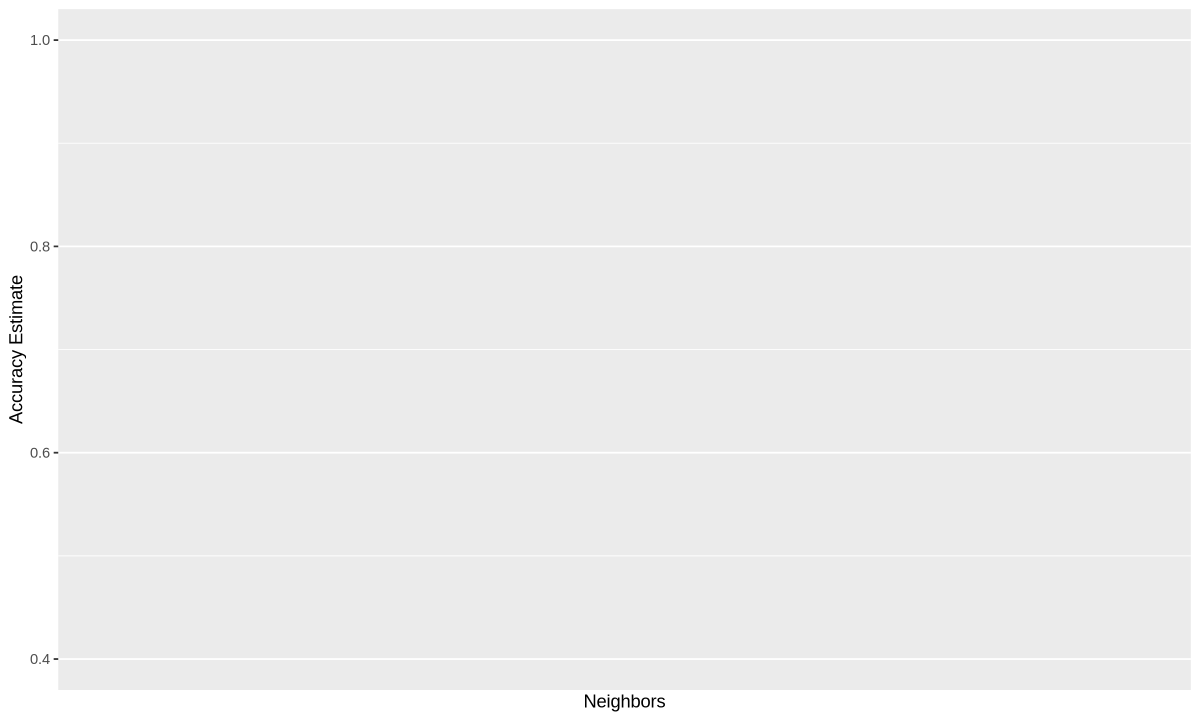

In [112]:
accuracies <- knn_results |> 
       filter(.metric==" accuracy")

accuracy_versus_k<- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis


# your code here
# No Answer - remove if you provide an answer
accuracy_versus_k

In [113]:
library(digest)
stopifnot("accuracies should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(accuracies)), "46e5e")), "0997e4e4447964b9939b1e9568d84118"))
stopifnot("dimensions of accuracies are not correct"= setequal(digest(paste(toString(dim(accuracies)), "46e5e")), "8cedd553339c071b180e61f10cfdf28e"))
stopifnot("column names of accuracies are not correct"= setequal(digest(paste(toString(sort(colnames(accuracies))), "46e5e")), "2a8c9a53e34adac9473d8d1c907823db"))
stopifnot("types of columns in accuracies are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(accuracies, class)))), "46e5e")), "81f12c87e1ee8306b5cddadaca0e36d4"))
stopifnot("values in one or more numerical columns in accuracies are not correct"= setequal(digest(paste(toString(if (any(sapply(accuracies, is.numeric))) sort(round(sapply(accuracies[, sapply(accuracies, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "46e5e")), "79c539f1d0785466fb727be70c307d15"))
stopifnot("values in one or more character columns in accuracies are not correct"= setequal(digest(paste(toString(if (any(sapply(accuracies, is.character))) sum(sapply(accuracies[sapply(accuracies, is.character)], function(x) length(unique(x)))) else 0), "46e5e")), "1a7bb030f51ddbea192a046a8698a18f"))
stopifnot("values in one or more factor columns in accuracies are not correct"= setequal(digest(paste(toString(if (any(sapply(accuracies, is.factor))) sum(sapply(accuracies[, sapply(accuracies, is.factor)], function(col) length(unique(col)))) else 0), "46e5e")), "f704210fb68c4318901fc537a6646806"))

stopifnot("type of plot is not correct (if you are using two types of geoms, try flipping the order of the geom objects!)"= setequal(digest(paste(toString(sapply(seq_len(length(accuracy_versus_k$layers)), function(i) {c(class(accuracy_versus_k$layers[[i]]$geom))[1]})), "46e5f")), "381fad6b562145b5a2b0b8ecc59e3828"))
stopifnot("variable x is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(accuracy_versus_k$layers)), function(i) {rlang::get_expr(c(accuracy_versus_k$layers[[i]]$mapping, accuracy_versus_k$mapping)$x)}), as.character))), "46e5f")), "41a16c8df2a0d2261cd2e8877b806469"))
stopifnot("variable y is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(accuracy_versus_k$layers)), function(i) {rlang::get_expr(c(accuracy_versus_k$layers[[i]]$mapping, accuracy_versus_k$mapping)$y)}), as.character))), "46e5f")), "45278f823c209b1469905ca17c98546c"))
stopifnot("x-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(accuracy_versus_k$layers[[1]]$mapping, accuracy_versus_k$mapping)$x)!= accuracy_versus_k$labels$x), "46e5f")), "148f6d31581f743ea6a83c9ee2d214e0"))
stopifnot("y-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(accuracy_versus_k$layers[[1]]$mapping, accuracy_versus_k$mapping)$y)!= accuracy_versus_k$labels$y), "46e5f")), "148f6d31581f743ea6a83c9ee2d214e0"))
stopifnot("incorrect colour variable in accuracy_versus_k, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(accuracy_versus_k$layers[[1]]$mapping, accuracy_versus_k$mapping)$colour)), "46e5f")), "8804d12f286cdf063970fa30b7d9499d"))
stopifnot("incorrect shape variable in accuracy_versus_k, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(accuracy_versus_k$layers[[1]]$mapping, accuracy_versus_k$mapping)$shape)), "46e5f")), "8804d12f286cdf063970fa30b7d9499d"))
stopifnot("the colour label in accuracy_versus_k is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(accuracy_versus_k$layers[[1]]$mapping, accuracy_versus_k$mapping)$colour) != accuracy_versus_k$labels$colour), "46e5f")), "8804d12f286cdf063970fa30b7d9499d"))
stopifnot("the shape label in accuracy_versus_k is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(accuracy_versus_k$layers[[1]]$mapping, accuracy_versus_k$mapping)$colour) != accuracy_versus_k$labels$shape), "46e5f")), "8804d12f286cdf063970fa30b7d9499d"))
stopifnot("fill variable in accuracy_versus_k is not correct"= setequal(digest(paste(toString(quo_name(accuracy_versus_k$mapping$fill)), "46e5f")), "d3edce9b20910bde345b435b4db5cc91"))
stopifnot("fill label in accuracy_versus_k is not informative"= setequal(digest(paste(toString((quo_name(accuracy_versus_k$mapping$fill) != accuracy_versus_k$labels$fill)), "46e5f")), "8804d12f286cdf063970fa30b7d9499d"))
stopifnot("position argument in accuracy_versus_k is not correct"= setequal(digest(paste(toString(class(accuracy_versus_k$layers[[1]]$position)[1]), "46e5f")), "8047f099a346fc411a272982113f2bdc"))

stopifnot("accuracy_versus_k$data should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(accuracy_versus_k$data)), "46e60")), "85e15f0d7204dec5c6263cd141aadf69"))
stopifnot("dimensions of accuracy_versus_k$data are not correct"= setequal(digest(paste(toString(dim(accuracy_versus_k$data)), "46e60")), "bcc905cf379eaece464383abfc1c3d9e"))
stopifnot("column names of accuracy_versus_k$data are not correct"= setequal(digest(paste(toString(sort(colnames(accuracy_versus_k$data))), "46e60")), "b59b0bddb8e1cac20d9b24bf672cf455"))
stopifnot("types of columns in accuracy_versus_k$data are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(accuracy_versus_k$data, class)))), "46e60")), "88a127d1ad47bc82f44eeb0a4c5204b0"))
stopifnot("values in one or more numerical columns in accuracy_versus_k$data are not correct"= setequal(digest(paste(toString(if (any(sapply(accuracy_versus_k$data, is.numeric))) sort(round(sapply(accuracy_versus_k$data[, sapply(accuracy_versus_k$data, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "46e60")), "c65a21737adbf82d60087ab9d4b98606"))
stopifnot("values in one or more character columns in accuracy_versus_k$data are not correct"= setequal(digest(paste(toString(if (any(sapply(accuracy_versus_k$data, is.character))) sum(sapply(accuracy_versus_k$data[sapply(accuracy_versus_k$data, is.character)], function(x) length(unique(x)))) else 0), "46e60")), "b30668a3ceab6735fce6593c51f980b9"))
stopifnot("values in one or more factor columns in accuracy_versus_k$data are not correct"= setequal(digest(paste(toString(if (any(sapply(accuracy_versus_k$data, is.factor))) sum(sapply(accuracy_versus_k$data[, sapply(accuracy_versus_k$data, is.factor)], function(col) length(unique(col)))) else 0), "46e60")), "afc4c8dce65049ff119304d03ce10300"))

print('Success!')

ERROR: Error: dimensions of accuracies are not correct


From the plot above, we can see that $K = 2$, $3$, or $4$ provides the highest accuracy. Larger $K$ values result in a reduced accuracy estimate. Remember: the values you see on this plot are estimates of the true accuracy of our classifier. Although the $K = 2$, $3$ or $4$ value is higher than the others on this plot, that doesn’t mean the classifier is necessarily more accurate with this parameter value! 

Great, now you have completed a full workflow analysis with cross-validation using the `tidymodels` package! For your information, we can choose any number of folds and typically, the more we use the better our accuracy estimate will be (lower standard error). However, more folds would mean a greater computation time. In practice, $C$ is chosen to be either 5 or 10. 

In [ ]:
source('cleanup.R')